In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6

# Introduction and Background

Can we quantify the quality of life with just a point on the map? We take a look at San Diego as sample, but this methodology could be applied to any neighborhood in the states. Using data such as the census and walkscore, we try to measure the ‘liveability’ of a neighborhood by looking at different aspects of the availability of methods of transportation rather than just more metrics such as an individual's level of education or income. 
	
A 2015 paper by Brian McKenzie of the US Census Bureau, “Transit Access and Population Change: The Demographic Profiles of Rail-Accessible Neighborhoods in the Washington, DC Area“, found that “young adults, recent movers, white workers, highly educated workers, and workers with high earnings all disproportionately live near rail stops” in Washington, DC and the five surrounding counties.
	
The implication is that there’s strong correlation between transportation infrastructure, housing prices, the availability of work, income, and economic mobility. We intend to probe the nature of this relationship to gauge, in particular, the role of transportation infrastructure in changing patterns of how people live and commute. We consider factors such as method of transportation, time of commute, and level of income across different data sets.
 
We hypothesize that when we control for things like population density and demographics, a more accessible public transportation leads to more economic mobility and higher standard of living.


Referencess:

* 1) Brian McKenzie. 2015. “Transit Access and Population Change: The Demographic Profiles of Rail-Accessible Neighborhoods in the Washington, DC Area.” SEHSD Working Paper No. 2015-023. U.S. Census Bureau. Washington, DC. https://www.census.gov/content/dam/Census/library/working-papers/2015/demo/SEHSD-WP2015-23.pdf

# Data Description

## WalkScore
<img src="walk-score-logo-large.png">

Walk Score data for each neighborhood in San Diego is scraped from Walk Score website (https://www.walkscore.com/CA/San_Diego) with the company's permission. Categories of information are as follows:

* Walk Score measures the walkability of any address based on the distance to nearby places and pedestrian friendliness
* Transit Score measures how well a location is served by public transit based on the distance and type of nearby transit lines.
* Bike Score measures whether an area is good for biking based on bike lanes and trails, hills, road connectivity, and destinations.

## Census Data

Census data for each census tract (sub-neighborhood divisions) is downloaded from the American FactFinder website (https://factfinder.census.gov). Categories of census data includes:

* Travel time to work
* Population
* Means of transportation to work (https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_15_5YR_S0802&prodType=table)
* Earnings
* Industry
* Race
* Sex

# Data Cleaning/Pre-processing

## Walk Score

Scrape the website

In [2]:
page = requests.get('https://www.walkscore.com/CA/San_Diego')
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.table('tr')[1:]
wsdat = []
for entry in table:
    split = entry.get_text().split()
    #Retrieve data and make '-' results nans
    data = {
            'Neighborhood': ' '.join(split[1:-4]),
            'Population': int(split[-1].replace(',','')),
            'Walk': float(split[-4].replace('-','nan')),
            'Transit': float(split[-3].replace('-','nan')),
            'Bike': float(split[-2].replace('-','nan'))
        }
    wsdat.append(data)

In [3]:
ws = pd.DataFrame(wsdat)[['Neighborhood', 'Population',
                          'Walk', 'Transit', 'Bike']]

In [4]:
ws

,Neighborhood,Population,Walk,Transit,Bike
0,Core-Columbia,5338,98.0,81.0,65.0
1,Horton Plaza,1474,97.0,81.0,82.0
2,Little Italy,3169,97.0,77.0,66.0
3,Gaslamp,976,97.0,80.0,77.0
4,Harborview,525,97.0,75.0,74.0
5,Cortez,3447,94.0,78.0,54.0
6,Marina,5600,94.0,79.0,84.0
7,East Village,10148,93.0,78.0,64.0
8,Village,4491,88.0,33.0,52.0
9,Sherman Heights,3340,87.0,68.0,59.0


## Census 

### Tract populations


In [5]:
tract_pop = pd.read_csv('Data/Tract Populations/ACS_15_5YR_B01003_with_ann.csv',
                 skiprows = [0])
tract_pop = tract_pop[['Geography', 'Estimate; Total']]
tract_pop.columns = ['Tract', "Population"]
tract_pop = tract_pop.dropna()

### Tract commute times

In [6]:
tract_commutes = pd.read_csv('Data/Commute Time/ACS_15_5YR_B08303_with_ann.csv',
                             skiprows = [0])
time_cols = tract_commutes.columns[np.where(['Estimate' in col for col in tract_commutes.columns])]
selection = np.hstack(['Geography', time_cols])
tract_commutes = tract_commutes[selection]
tract_commutes.columns = [
   'Tract', 
   'Commuters',
   'Commute Time Less than 5 minutes',
   'Commute Time 5 to 9 minutes',
   'Commute Time 10 to 14 minutes',
   'Commute Time 15 to 19 minutes',
   'Commute Time 20 to 24 minutes',
   'Commute Time 25 to 29 minutes',
   'Commute Time 30 to 34 minutes',
   'Commute Time 35 to 39 minutes',
   'Commute Time 40 to 44 minutes',
   'Commute Time 45 to 59 minutes',
   'Commute Time 60 to 89 minutes',
   'Commute Time 90 or more minutes'
]

Turn counts to percents


In [7]:
cols = tract_commutes.columns
tract_commutes = pd.concat(
    [
        tract_commutes[cols[0]], 
        tract_commutes[cols[2:]].div(tract_commutes['Commuters'], axis = 0),
    ],
    axis = 1
)
tract_commutes = tract_commutes.dropna().reset_index(drop=True)

Do columns sum to 1?

In [8]:
for i in range(len(tract_commutes)):
    assert np.isclose(tract_commutes.ix[i][1:].sum(),1)

Get average commute times

In [9]:
times = [(0+4)/2, (5+9)/2, (10+14)/2, (15+19)/2, (20+24)/2, (25+29)/2, (30+34)/2,
(35+39)/2, (40+44)/2, (45+59)/2, (60+89)/2, 90]

av = []
for i in range(len(tract_commutes)):
    av.append(np.dot(tract_commutes.ix[i][1:], times))
tract_commutes["Average Commute"] = av

### Means of transportation to work (https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_15_5YR_S0802&prodType=table)

**TODO**

All data below (and some above, plus some more demographic data) is actually included in this table. May simply use this rather than retrieving all categories independently of each other

* Earnings
* Industry
* Race
* Sex

### Combining census data

In [10]:
census_tract_data = tract_pop.merge(tract_commutes, on = 'Tract')

Renaming tracts to be more machine readable

In [11]:
for i, row in census_tract_data.iterrows():
    start = 13
    end = row.Tract.find(",")
    census_tract_data.set_value(i,'Tract',row.Tract[start:end])

In [12]:
census_tract_data

,Tract,Population,Commute Time Less than 5 minutes,Commute Time 5 to 9 minutes,Commute Time 10 to 14 minutes,Commute Time 15 to 19 minutes,Commute Time 20 to 24 minutes,Commute Time 25 to 29 minutes,Commute Time 30 to 34 minutes,Commute Time 35 to 39 minutes,Commute Time 40 to 44 minutes,Commute Time 45 to 59 minutes,Commute Time 60 to 89 minutes,Commute Time 90 or more minutes,Average Commute
0,1,2716,0.033673,0.123469,0.232653,0.129592,0.207143,0.054082,0.064286,0.018367,0.033673,0.030612,0.031633,0.040816,23.716837
1,2.01,2223,0.024725,0.160256,0.103480,0.086996,0.241758,0.083333,0.076923,0.088828,0.033883,0.011905,0.033883,0.054029,26.637821
2,2.02,4683,0.004840,0.043187,0.215190,0.335443,0.100521,0.088608,0.099032,0.044676,0.005585,0.051005,0.003723,0.008191,21.924051
3,3,4875,0.015063,0.079425,0.186238,0.250257,0.141390,0.073263,0.098254,0.014721,0.027730,0.040397,0.044163,0.029100,25.027217
4,4,3606,0.022497,0.046758,0.147331,0.249228,0.167181,0.092633,0.144685,0.040582,0.034848,0.035289,0.018968,0.000000,23.399427
5,5,2873,0.001157,0.074074,0.146991,0.253472,0.191551,0.074074,0.116319,0.014468,0.039352,0.032986,0.037037,0.018519,24.859375
6,6,2904,0.034429,0.052165,0.190402,0.178404,0.170057,0.046948,0.147105,0.020866,0.057381,0.080856,0.012520,0.008868,24.585290
7,7,4576,0.020715,0.134648,0.129302,0.226529,0.172736,0.046442,0.105914,0.021383,0.008019,0.061143,0.046108,0.027063,25.008019
8,8,3927,0.005186,0.052805,0.238567,0.180575,0.178218,0.058934,0.162659,0.013201,0.007544,0.060820,0.013201,0.028289,24.527110
9,9,5184,0.015335,0.098403,0.137700,0.145367,0.181789,0.066773,0.172843,0.013738,0.029393,0.018211,0.098403,0.022045,28.181150


## Combining WalkScores (Neighborhoods) with Census (Tracts)

Shapefiles for tracts and neighborhoods are compared to find overlaps

In [13]:
import shapefile

Neighborhood shapefiles

In [14]:
# neighborhood shapefile data from Zillow:
# https://www.zillow.com/howto/api/neighborhood-boundaries.htm
ca_neighborhoods = shapefile.Reader("Data/CA Neighborhoods/ZillowNeighborhoods-CA.shp")
ca_neighborhood_metadata = ca_neighborhoods.shapeRecords()

In [15]:
sd_neighborhood_shapes = []
sd_neighborhood_metadata = []
sd_neighborhood_names = []
for i in range(len(ca_neighborhood_metadata)):
    metadata = ca_neighborhood_metadata[i]
    if metadata.record[2] == 'San Diego': #San Diego City
        shape = ca_neighborhoods.shapes()[i]
        sd_neighborhood_shapes.append(shape)
        sd_neighborhood_metadata.append(metadata)
        sd_neighborhood_names.append(metadata.record[3])

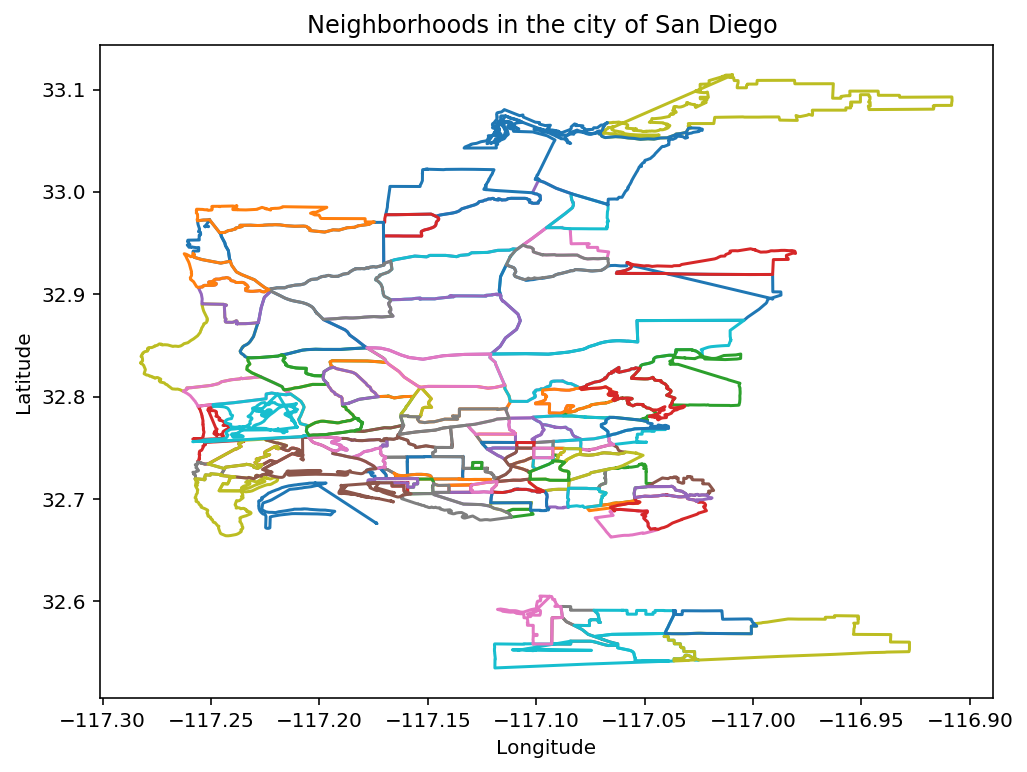

In [16]:
for shape in sd_neighborhood_shapes:
    plt.plot(np.array(shape.points)[:,0], np.array(shape.points)[:,1])
plt.title('Neighborhoods in the city of San Diego ')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Tract shapefiles

In [17]:
#2015 census tracts
#https://www.census.gov/geo/maps-data/data/cbf/cbf_tracts.html
ca_tracts = shapefile.Reader("Data/CA Census Tracts/cb_2015_06_tract_500k.shp")
ca_tract_metadata = ca_tracts.shapeRecords()

In [18]:
sd_tract_shapes = []
sd_tract_metadata = []
for i in range(len(ca_tract_metadata)):
    metadata = ca_tract_metadata[i]
    if metadata.record[1] == '073': #San Diego county
        shape = ca_tracts.shapes()[i]
        sd_tract_shapes.append(shape)
        sd_tract_metadata.append(metadata)

Retrieve tract names from shapefile records

In [19]:
sd_tract_ids = []
for metadata in sd_tract_metadata:
    tract_id = metadata.record[2]
    start = str(int(tract_id[:-2]))
    end = tract_id[-2:]
    if end !='00':
        cleaned_id = '.'.join([start,end])
    else:
        cleaned_id = start
    sd_tract_ids.append(cleaned_id)

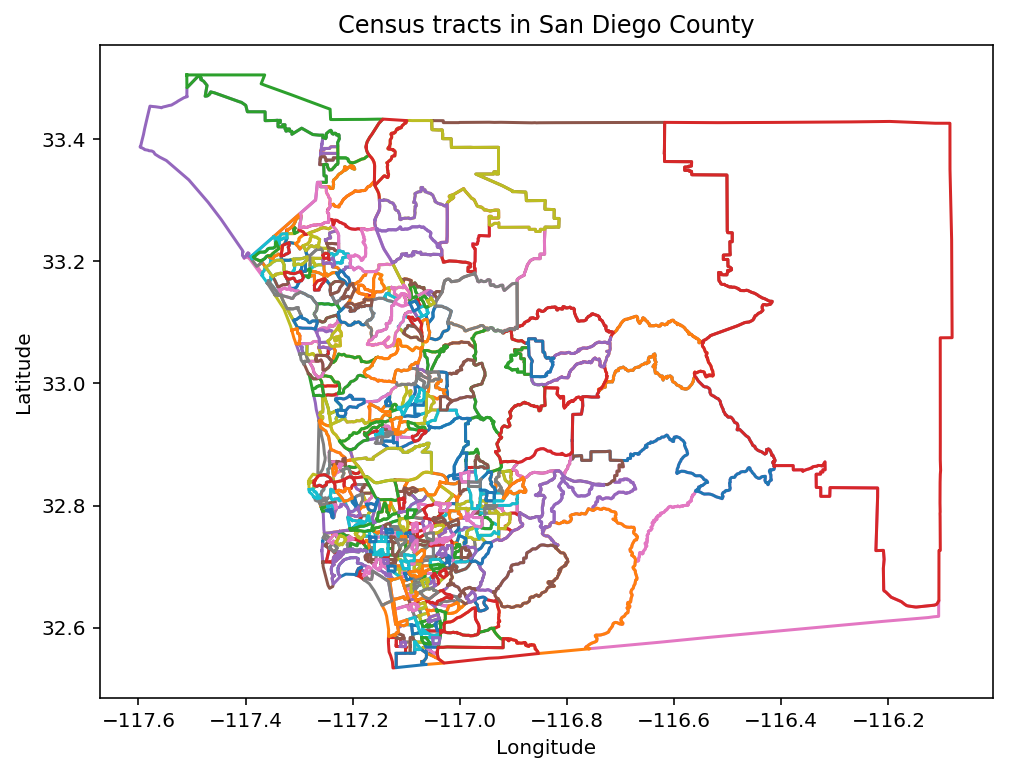

In [20]:
for shape in sd_tract_shapes:
    plt.plot(np.array(shape.points)[:,0], np.array(shape.points)[:,1])
plt.title('Census tracts in San Diego County')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

### Matching tracts and neighborhoods

In [21]:
import shapely
from shapely.geometry import Polygon

For each tract, which neighborhoods overlap it, and how much of its area do each of them cover?

In [22]:
tract_coverage = {tract_id: {'Neighborhoods': [], 'Coverage': [], 'Area': 0}
         for tract_id in sd_tract_ids}

for i in range(len(sd_tract_shapes)):
    tract_id = sd_tract_ids[i]
    tract_shape = sd_tract_shapes[i]
    tract_poly = Polygon(tract_shape.points).buffer(0)
    
    #Tract area, 
    area = tract_poly.area
    #Projection is approximately flat for small angles on globe. Measured in km
    tract_coverage[tract_id]['Area'] = area*(np.pi/180 * 6371**2) 
    for j in range(len(sd_neighborhood_shapes)):
        neighborhood_name = sd_neighborhood_names[j]
        neighborhood_shape = sd_neighborhood_shapes[j]
        neighborhood_poly = Polygon(neighborhood_shape.points).buffer(0)

        #Intersectional area
        intersect_area = tract_poly.intersection(neighborhood_poly).area
        coverage = 0 if area == 0 else intersect_area/area #Proportion
        if coverage > 0:
            tract_coverage[tract_id]['Neighborhoods'].append(neighborhood_name)
            tract_coverage[tract_id]['Coverage'].append(coverage)

Weighted (by percent of tract covered) average of Walk Score Neighborhood data for each tract

In [23]:
cols = ['Walk', 'Transit', 'Bike'] #Data we want from neighborhoods
thresh = .9 #Minimum tract coverage before discarding data
tract_ws_dict = {**{'Tract': []}, **{col: [] for col in cols}}

for tract in tract_coverage.keys():
    covered = 0
    d = tract_coverage[tract]
    neighborhoods = d['Neighborhoods']
    coverage = d['Coverage']
    
    aggregated_data = np.zeros_like(cols, dtype = float)
    
    for i in range(len(neighborhoods)):
        #Check if we have reference data
        if neighborhoods[i] in ws['Neighborhood'].dropna().tolist():
            covered += coverage[i]
            data = ws[ws['Neighborhood'] == neighborhoods[i]][cols].values[0]
            aggregated_data = aggregated_data + data*coverage[i]
    if covered > .9:
        aggregated_data = aggregated_data / covered
    else:
        aggregated_data = np.zeros_like(cols, dtype = float)*np.nan
    tract_ws_dict['Tract'].append(tract)
    for i in range(len(cols)):
        tract_ws_dict[cols[i]].append(aggregated_data[i])

In [24]:
tract_ws = pd.DataFrame(tract_ws_dict).dropna()

Merge new tract walk scores with other original tract data (commute times, etc)

In [25]:
tract_data_all = tract_ws.merge(census_tract_data, on='Tract')
#rearrange columns
cols = [tract_data_all.columns.tolist()[1]] + [tract_data_all.columns.tolist()[0]] + tract_data_all.columns.tolist()[2:]
tract_data_all = tract_data_all[cols]

Add area of each tract (in km)

In [26]:
tract_area = {tract: tract_coverage[tract]['Area'] for tract in tract_coverage}
tract_data_all['Area'] = tract_data_all['Tract'].map(tract_area)

Add population density data

In [27]:
tract_data_all['Density'] = tract_data_all['Population'] / tract_data_all['Area']

# Data Visualization

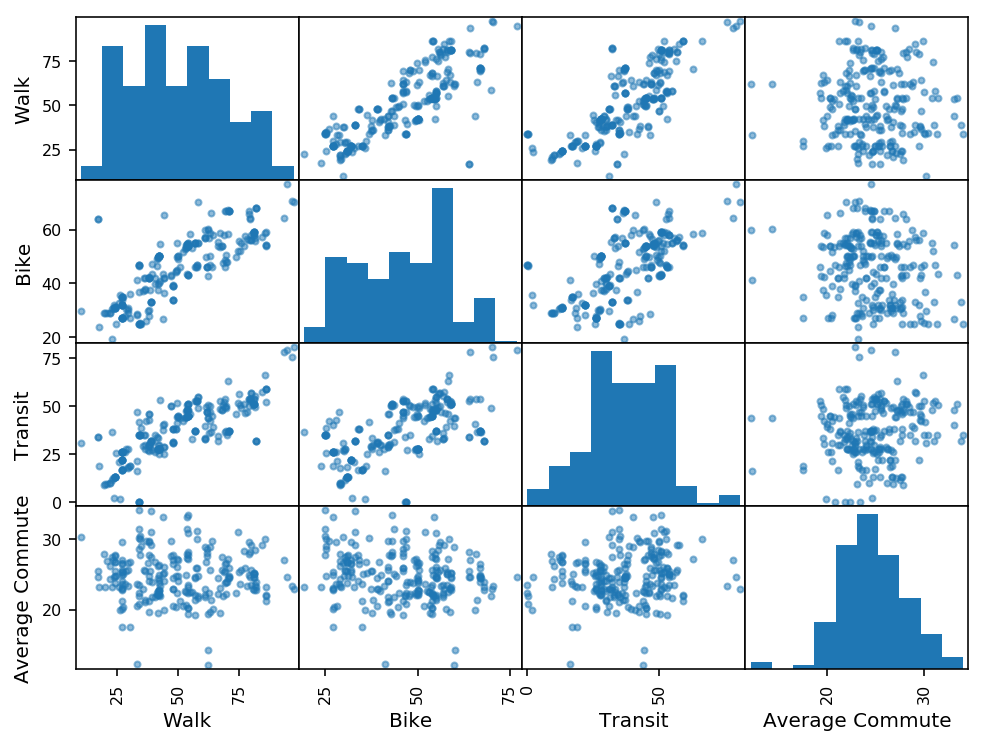

In [28]:
scatter_mat = pd.scatter_matrix(tract_data_all[['Walk', 'Bike', 'Transit', 'Average Commute']])

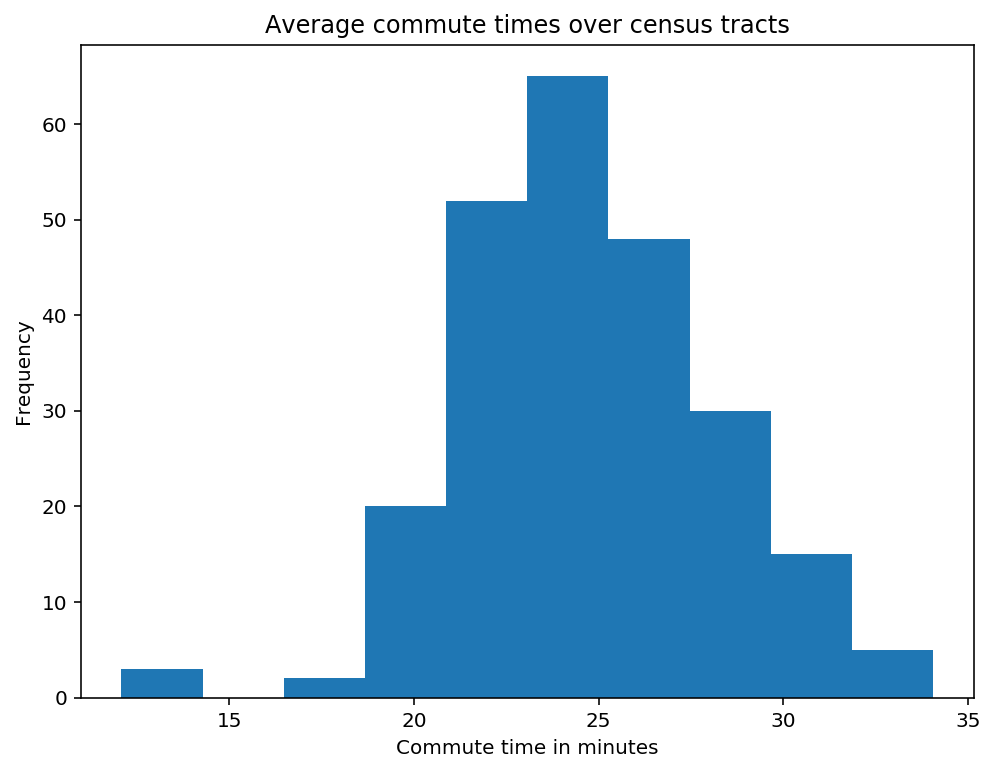

In [29]:
commute_hist = plt.hist(tract_data_all['Average Commute'].dropna())
plt.title('Average commute times over census tracts')
plt.xlabel('Commute time in minutes')
plt.ylabel('Frequency')

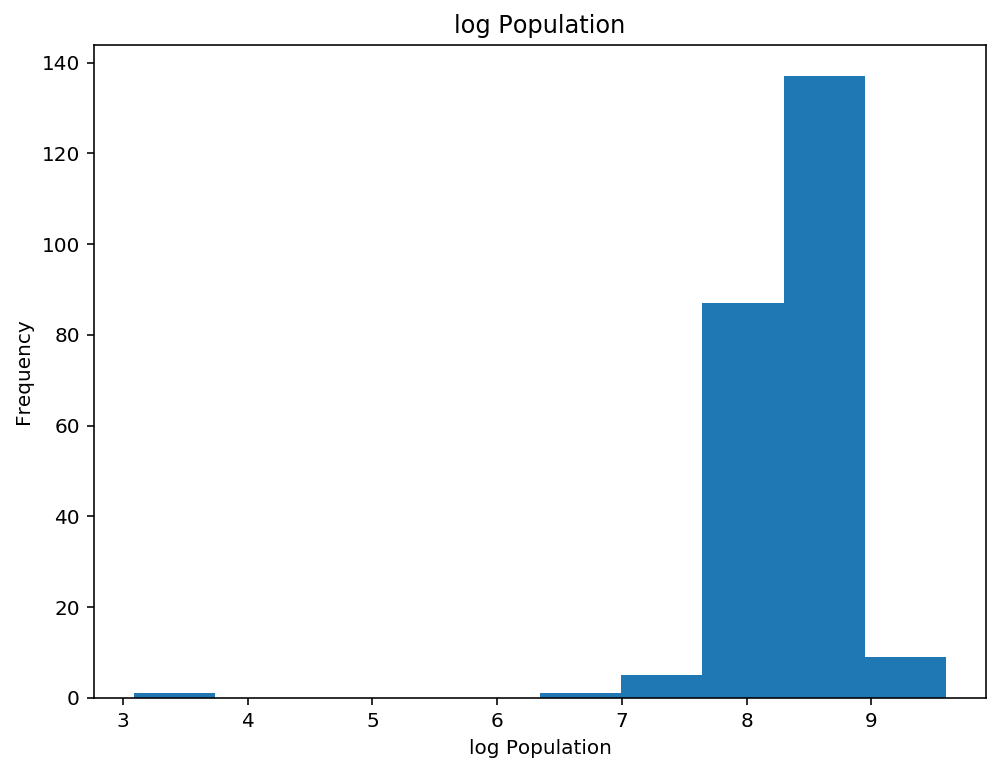

In [30]:
plt.hist(np.log(tract_data_all['Population']))
plt.title('log Population')
plt.xlabel('log Population')
plt.ylabel('Frequency')

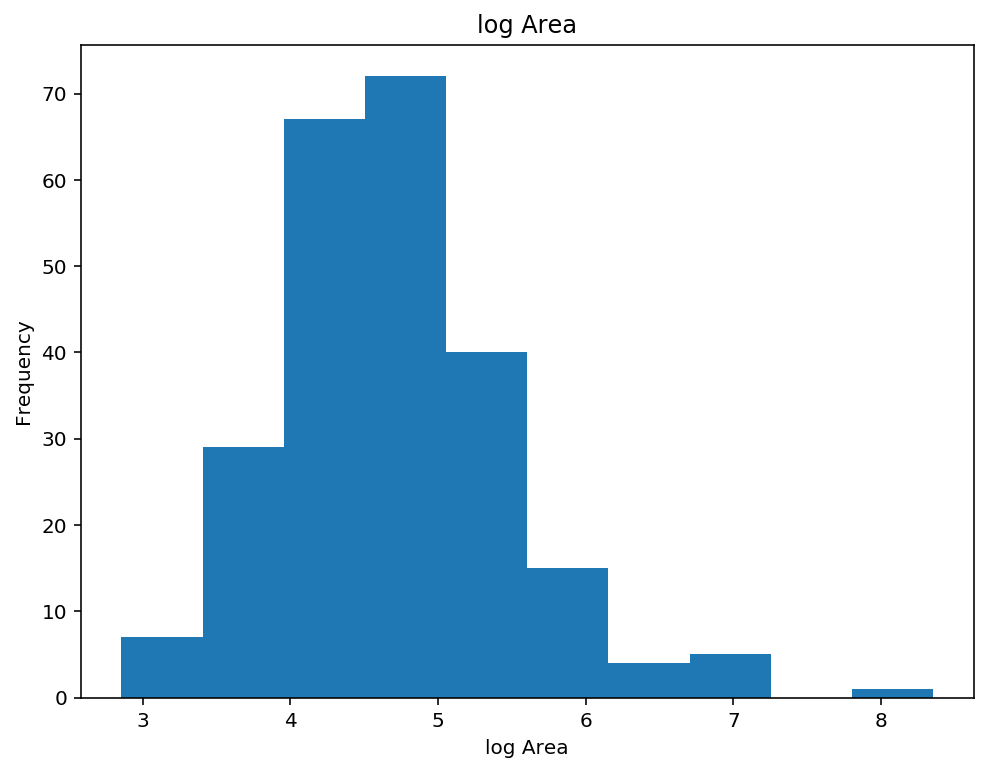

In [31]:
plt.hist(np.log(tract_data_all['Area']))
plt.title('log Area')
plt.xlabel('log Area')
plt.ylabel('Frequency')

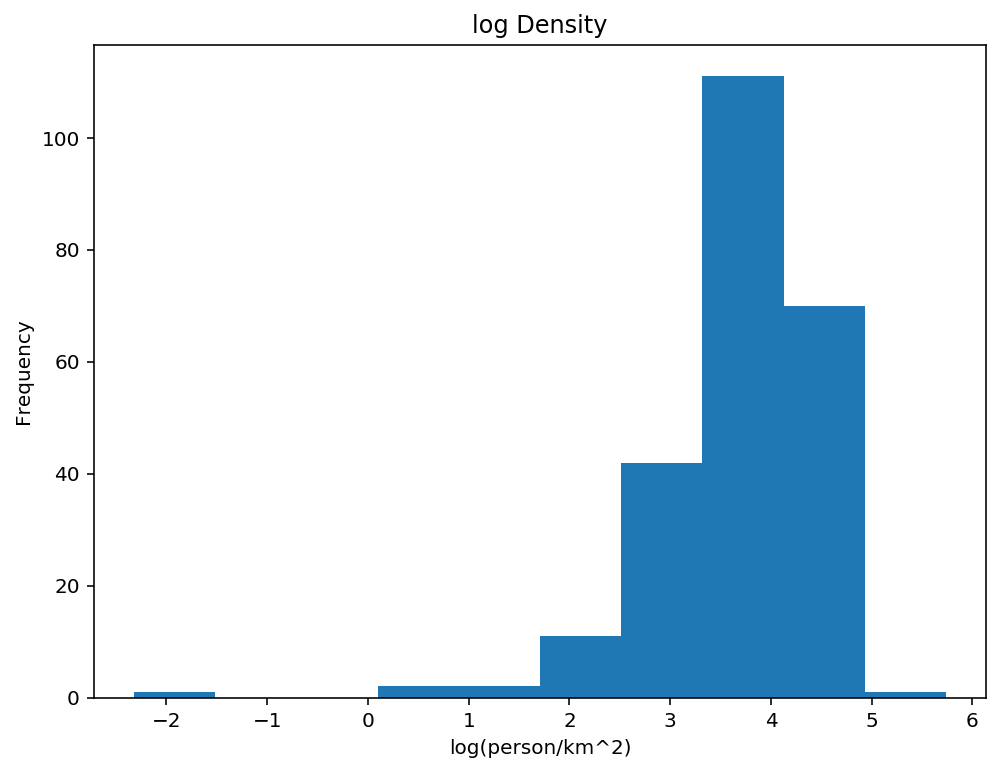

In [32]:
log_density = np.log(tract_data_all['Density'])
plt.hist(log_density)
plt.title('log Density')
plt.xlabel('log(person/km^2)')
plt.ylabel('Frequency')

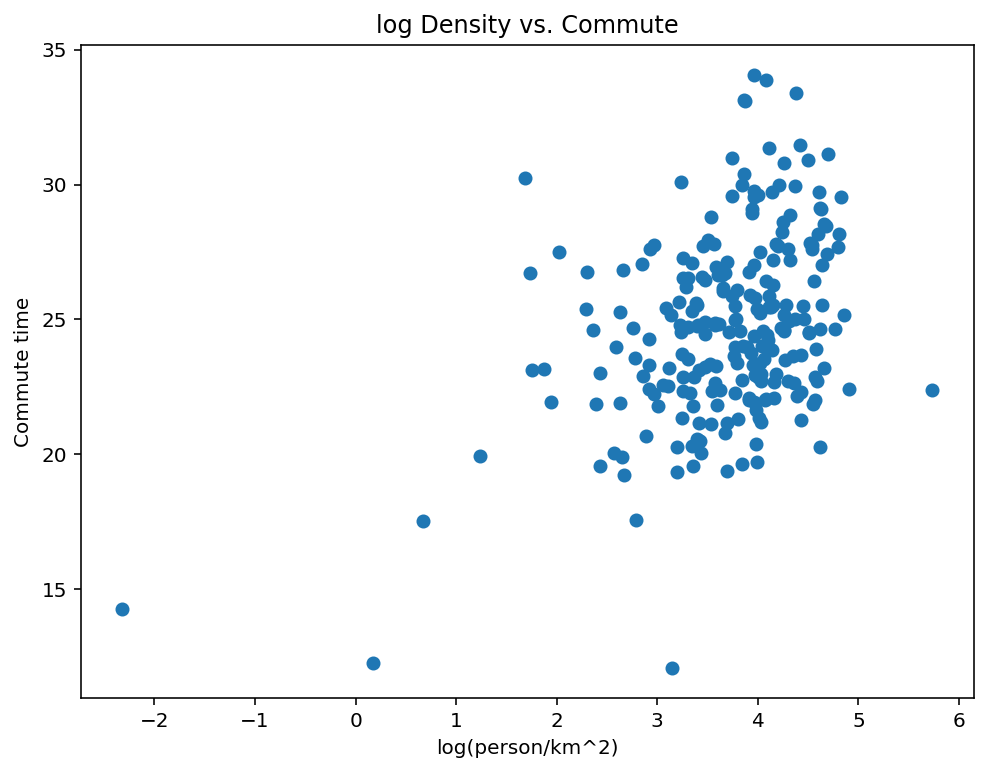

In [33]:
plt.scatter(log_density, tract_data_all['Average Commute'])
plt.title('log Density vs. Commute')
plt.xlabel('log(person/km^2)')
plt.ylabel('Commute time')

## Maps

In [34]:
import folium

In [147]:
lat = 32.83
lon = -117.2375
zoom_start = 9.5

colors = ['#ffffb2','#fed976','#feb24c','#fd8d3c','#fc4e2a','#e31a1c','#b10026']

In [148]:
def colormap(val, minval, maxval, colors):
    r = np.linspace(minval,maxval+.01,len(colors)+1)
    out = np.where(np.array([(r[i] <= val < r[i+1]) 
                             for i in range(len(colors))]))[0][0]
    return(colors[out])

### Average Commute

In [149]:
m = folium.Map(location=[lat, lon], zoom_start=zoom_start, tiles='Stamen Toner')

mapon = 'Average Commute'
minval = tract_data_all[mapon].min()
maxval = tract_data_all[mapon].max()
for i in range(len(sd_tract_shapes)):
    if sd_tract_ids[i] in list(tract_data_all['Tract']):
        selected = tract_data_all[tract_data_all['Tract'] == sd_tract_ids[i]]
        color_val = selected[mapon].values[0]
        neighborhood_shape = sd_tract_shapes[i].points
        shape = [(lat, lon) for lon, lat in neighborhood_shape]
        poly = folium.features.PolygonMarker(locations=shape, weight=2, color = 'black', 
                                             fill_color=colormap(color_val, minval, maxval, colors))
        m.add_child(poly)
        
m

### Density

In [124]:
m = folium.Map(location=[lat, lon], zoom_start=zoom_start, tiles='Stamen Toner')

mapon = 'Density'
minval = tract_data_all[mapon].min()
maxval = tract_data_all[mapon].max()
for i in range(len(sd_tract_shapes)):
    if sd_tract_ids[i] in list(tract_data_all['Tract']):
        selected = tract_data_all[tract_data_all['Tract'] == sd_tract_ids[i]]
        color_val = selected[mapon].values[0]
        neighborhood_shape = sd_tract_shapes[i].points
        shape = [(lat, lon) for lon, lat in neighborhood_shape]
        poly = folium.features.PolygonMarker(locations=shape, weight=2, color = 'black', 
                                             fill_color=colormap(color_val, minval, maxval, colors))
        m.add_child(poly)
        
m

### Transit

In [125]:
m = folium.Map(location=[lat, lon], zoom_start=zoom_start, tiles='Stamen Toner')

mapon = 'Transit'
minval = tract_data_all[mapon].min()
maxval = tract_data_all[mapon].max()
for i in range(len(sd_tract_shapes)):
    if sd_tract_ids[i] in list(tract_data_all['Tract']):
        selected = tract_data_all[tract_data_all['Tract'] == sd_tract_ids[i]]
        color_val = selected[mapon].values[0]
        neighborhood_shape = sd_tract_shapes[i].points
        shape = [(lat, lon) for lon, lat in neighborhood_shape]
        poly = folium.features.PolygonMarker(locations=shape, weight=2, color = 'black', 
                                             fill_color=colormap(color_val, minval, maxval, colors))
        m.add_child(poly)
        
m

### Bike

In [128]:
m = folium.Map(location=[lat, lon], zoom_start=zoom_start, tiles='Stamen Toner')

mapon = 'Bike'
minval = tract_data_all[mapon].min()
maxval = tract_data_all[mapon].max()
for i in range(len(sd_tract_shapes)):
    if sd_tract_ids[i] in list(tract_data_all['Tract']):
        selected = tract_data_all[tract_data_all['Tract'] == sd_tract_ids[i]]
        color_val = selected[mapon].values[0]
        neighborhood_shape = sd_tract_shapes[i].points
        shape = [(lat, lon) for lon, lat in neighborhood_shape]
        poly = folium.features.PolygonMarker(locations=shape, weight=2, color = 'black', 
                                             fill_color=colormap(color_val, minval, maxval, colors))
        m.add_child(poly)
        
m

# Data Analysis and Results

The data

In [38]:
tract_data_all

,Tract,Bike,Transit,Walk,Population,Commute Time Less than 5 minutes,Commute Time 5 to 9 minutes,Commute Time 10 to 14 minutes,Commute Time 15 to 19 minutes,Commute Time 20 to 24 minutes,Commute Time 25 to 29 minutes,Commute Time 30 to 34 minutes,Commute Time 35 to 39 minutes,Commute Time 40 to 44 minutes,Commute Time 45 to 59 minutes,Commute Time 60 to 89 minutes,Commute Time 90 or more minutes,Average Commute,Area,Density
0,4,57.962561,53.972435,79.887327,3606,0.022497,0.046758,0.147331,0.249228,0.167181,0.092633,0.144685,0.040582,0.034848,0.035289,0.018968,0.000000,23.399427,81.154666,44.433674
1,21,51.899553,50.690119,75.606516,4842,0.010163,0.025407,0.130759,0.307588,0.153455,0.107385,0.147696,0.036247,0.047764,0.013889,0.011518,0.008130,23.657182,62.338649,77.672520
2,33.03,46.013278,47.079668,61.946888,4469,0.000000,0.041019,0.049720,0.159105,0.178993,0.159727,0.223120,0.036047,0.067744,0.047234,0.028589,0.008701,28.527035,42.501400,105.149478
3,39.01,55.939457,56.939457,79.895954,4456,0.000000,0.025983,0.106742,0.143258,0.192416,0.115871,0.242275,0.004916,0.044944,0.059691,0.051966,0.011938,29.132022,43.846722,101.626754
4,57,54.124088,59.186133,86.113748,1728,0.027251,0.120853,0.297393,0.143365,0.167062,0.077014,0.077014,0.000000,0.014218,0.004739,0.031991,0.039100,21.871445,18.290629,94.474610
5,63,59.889287,44.039338,62.070989,3236,0.228431,0.382353,0.083333,0.188235,0.019608,0.021569,0.032353,0.000000,0.007843,0.014706,0.021569,0.000000,12.083333,139.278176,23.234078
6,75.01,67.912881,32.007920,81.833682,3840,0.013921,0.039056,0.241686,0.202630,0.170147,0.076953,0.130317,0.024749,0.016241,0.066125,0.011601,0.006574,23.129544,70.797869,54.238920
7,83.13,27.009976,26.006105,27.008518,2148,0.036014,0.135654,0.201681,0.246098,0.190876,0.064826,0.076831,0.000000,0.000000,0.004802,0.007203,0.036014,20.061224,164.494076,13.058221
8,83.59,49.677436,27.723516,41.692796,4530,0.042047,0.102737,0.180881,0.199524,0.212217,0.061087,0.084490,0.013090,0.034510,0.031733,0.021023,0.016660,22.037088,76.280153,59.386352
9,86,49.722620,44.642362,49.515055,7339,0.000000,0.034372,0.171217,0.205589,0.149374,0.082236,0.181818,0.030196,0.032766,0.050755,0.044330,0.017347,27.111468,182.318534,40.253724


## Ordinary least squares

In [39]:
import patsy
import statsmodels.api as sm
outcome, predictors = patsy.dmatrices("Q('Average Commute') ~ \
                                      Bike + Walk + Transit + (np.log(Density))",
                                          tract_data_all)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                             OLS Regression Results                             
Dep. Variable:     Q('Average Commute')   R-squared:                       0.313
Model:                              OLS   Adj. R-squared:                  0.301
Method:                   Least Squares   F-statistic:                     26.77
Date:                  Mon, 05 Jun 2017   Prob (F-statistic):           2.60e-18
Time:                          21:18:23   Log-Likelihood:                -589.64
No. Observations:                   240   AIC:                             1189.
Df Residuals:                       235   BIC:                             1207.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          21.

## Robust regression

In [40]:
outcome, predictors = patsy.dmatrices("Q('Average Commute') ~ \
                                      Bike + Walk + Transit + np.log(Density)",
                                          tract_data_all)
mod = sm.RLM(outcome, predictors)
res = mod.fit()
print(res.summary())

                     Robust linear Model Regression Results                     
Dep. Variable:     Q('Average Commute')   No. Observations:                  240
Model:                              RLM   Df Residuals:                      235
Method:                            IRLS   Df Model:                            4
Norm:                            HuberT                                         
Scale Est.:                         mad                                         
Cov Type:                            H1                                         
Date:                  Mon, 05 Jun 2017                                         
Time:                          21:18:24                                         
No. Iterations:                      14                                         
                      coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          21.

# Conclusions/Discussion

Population density is strongly positively correlated with commute time, i.e. neighborhoods with high population density have a higher average commute time.

We found that Bike score is negatively correlated with commute time while Transit score is positively correlated with commute time, even after controlling for population density. Bike score is likely related to commute time through bike infrastructure rather than geography since Walk score is uncorrelated to commute time, and we would expect walkable geography to be bikeable as well.


Why would bike infrastructure reduce commute times?
Hypothesis: bikers reduce traffic congestion
 
Why is Transit score positively correlated with commute time? Does this refute our initial hypothesis at the top of this page?

* Hypothesis: Congested neighborhoods build transit infrastructure, but it has little effect on alleviating congestion
 
* This may refute our first hypothesis, but we still wish to control for other possibly confounding variables. Question: does more public transportation infrastructure lead to more adoption of public transit as a means of getting around?


**TODO** Add other regressors to see if they explain more of the variance 

* Earnings
* Industry
* Race
* Sex

Next questions (**TODO by Saturday**):

* Can we predict transit method based on congestion levels (inferred from commute times) and bike/walk/transit scores? (And other regressors listed above)
* Explore relationship of commute time per method of transportation, relationship between bike lanes, walk time, transport time and income.
* Can we predict income from transit access?